> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up 


### Question(s) for Analysis


What is the percentage of people that attend and not attend the appointment?

What is the percentage of gender that attend and not attend the appointment?

What is the number of people that attend and have Scholarship ?

What is the highest gender attend the appointment according to Scholarship, Hypertension,  Diabetes, Alcoholism?


In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for dimensions,Data type, and describe of dataset befor cleaning.




### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# number of samples and columns
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The mean of age is 37 and the max is 115 and the min is -1 that not correct for min.


### Data Cleaning
>Check my dataset from null value and duplacate data
>
>Rename some colums
>
>Drop the colums not needed
>
>Convert AppointmentDay and ScheduledDay object datatype to date datatype
>
 

In [9]:
# check for duplicated
df.duplicated().any()

False

In [10]:
# check for null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# Rename columns
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# drop columns not need
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning my dataset now I'll analyze it looking ask questions then answer it by visualization.

General look for data

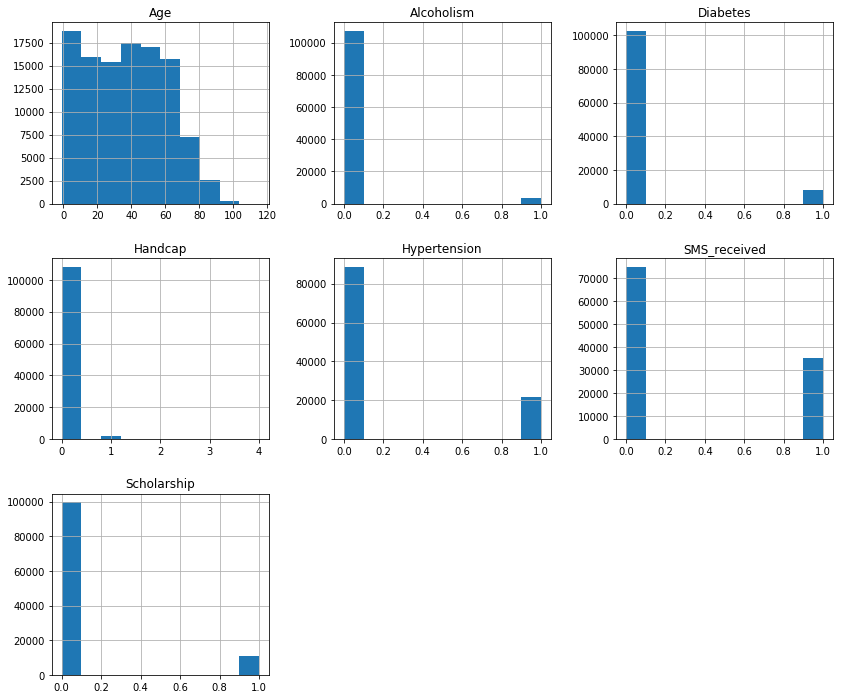

In [16]:
df.hist(figsize=(14,12));

Age : Patients' ages ranged from 0 to 115.
Alcoholism : Most patients are not addicted to alcohol.
Diabetes : Most patients do not have diabetes.
Handcap : Most patients do not have a disability.
Hypertension : Most patients do not have Hypertension, but those who have Hypertension are more than those who have diabetes.
SMS_received : The number of people who received the SMS message is twice the number of people who did not receive it.

In [17]:
# Dividing the patients to groups : show and noshow.
show =df.No_show == 'No'
noshow =df.No_show == 'Yes'

In [18]:
df[show].count()

Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hypertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
No_show           88208
dtype: int64

In [19]:
df[noshow].count()

Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

No show less than show, no show is 22319 and show ia 88208.

### Research Question 1 (What is the percentage of people that attend and not attend the appointment?)

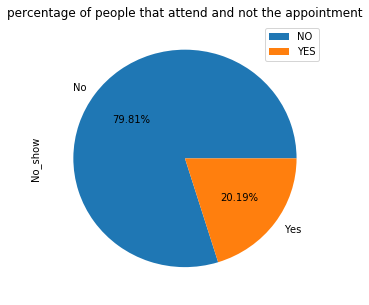

In [20]:
#What is the percentage of people that attend and not attend the appointment?
def No_show(col):
    col.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%')
    plt.title('percentage of people that attend and not the appointment')
    plt.legend(['NO', 'YES'])
    plt.show()
    
No_show(df.No_show)

The percentage of people that attend the appointment is 79.81% and this is more than the people that not attend the appointment which is 20.19%.

### Research Question 2 (What is the percentage of gender that attend and not attend the appointment?)

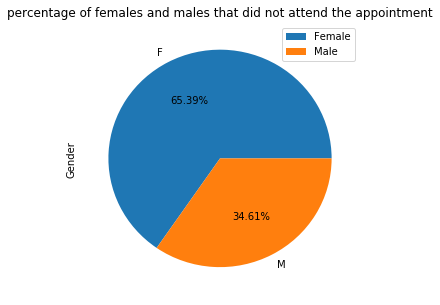

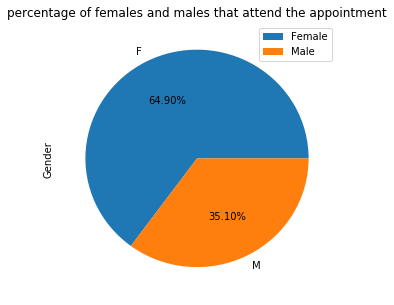

In [21]:
#What is the percentage of females and males that did not attend and attend the appointment?
def gender(col,flag):
    col.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%')
    if(flag):
        plt.title('percentage of females and males that attend the appointment')
    else:
        plt.title('percentage of females and males that did not attend the appointment')
    plt.legend(['Female', 'Male'])
    plt.show()
    
gender(df.Gender[noshow], False)
gender(df.Gender[show], True)

It turns out that the number of females who did not attend and attend appointments is twice that of males.

### Research Question 3 (What is the number of people that attend and have Scholarship ?)

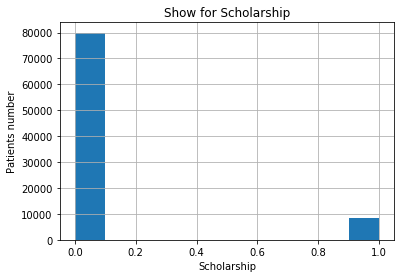

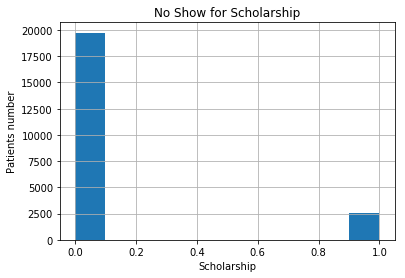

In [22]:
def scholarship(col,flag):
    col.hist(label='show')
    plt.xlabel('Scholarship')
    plt.ylabel('Patients number')
    if(flag):
        plt.title('Show for Scholarship')
    else:
        plt.title('No Show for Scholarship')
    plt.show()
    
scholarship( df.Scholarship[show], True)
scholarship( df.Scholarship[noshow], False)

The number of attendees who have a scholarship is approximately 9000 and this is more than those who not attend and have a scholarship

### Research Question 4  (What is the highest gender attend the appointment according to Scholarship, Hypertension,  Diabetes, Alcoholism?)

In [23]:
def compare_with_gender(compared_attribute):
    df[show].groupby([compared_attribute,'Gender']).count()['Age'].plot(kind='bar',color='green')
    df[noshow].groupby([compared_attribute,'Gender']).count()['Age'].plot(kind='bar',color='gray')
    plt.legend(['Show', 'No Shows'])
    plt.title('Show and No Show for ' + compared_attribute + ' and Gender')
    plt.show()

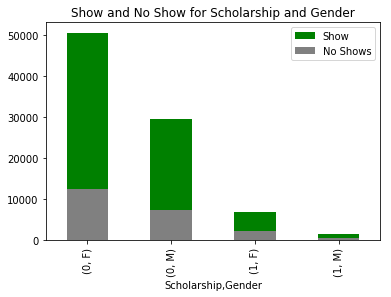

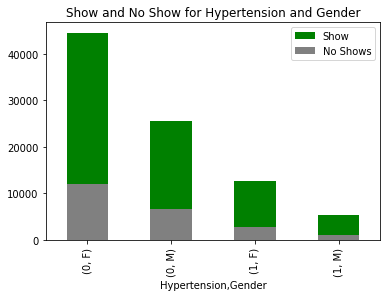

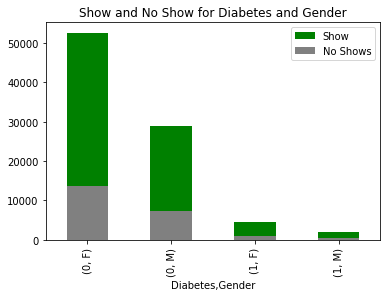

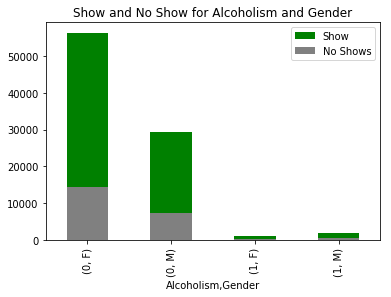

In [24]:
compare_with_gender('Scholarship')
compare_with_gender('Hypertension')
compare_with_gender('Diabetes')
compare_with_gender('Alcoholism')

In general the female is higher than male exept in alcoholism the male is higher than female if ther have alcoholism

<a id='conclusions'></a>
## Conclusions



>In the end, the result of my analysis of this dataset shows that the number of attendees who received a scholarship reached nearly 9000, and this is more than those who did not attend and have a scholarship.

>It was also found that the percentage of people who attended the appointment was 79.81%, and this is more than the number of people who did not attend the appointment, which amounted to 20.19%.

>Finally, in general, the female is higher than the male with the exception of alcoholism, and the male is higher than the female if there is alcoholism.

## Limitations

> This study has some limitations. Firstly, the data set does not have enough explnation for values for example 0 and 1. Also, there is an incorrect data type for some for example the date columne the type it was object and this is not true. 
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0